# Intro to Gradient Descent

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [3]:
x,y=make_regression(n_samples=4,n_features=1,n_informative=1,n_targets=1,noise=80,random_state=13)

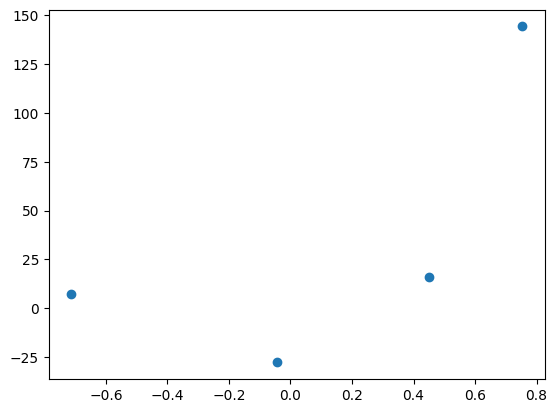

In [4]:
plt.scatter(x,y)

In [5]:
#OLS
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [6]:
lr.coef_,lr.intercept_

(array([78.35063668]), np.float64(26.15963284313262))

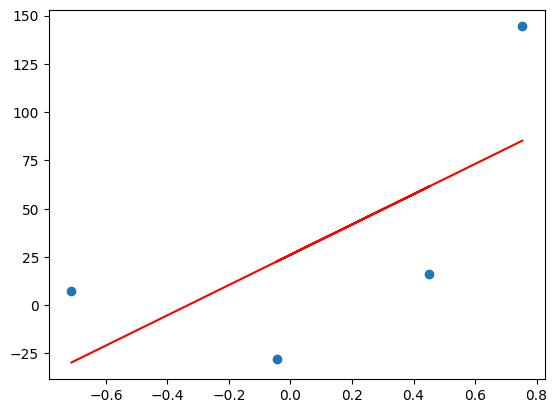

In [8]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red')

In [11]:
#apply gd mis const= lr.coef_
# taking b=0
y_pred=((lr.coef_*x)+0).reshape(4)
y

array([  7.21786552,  16.04609925, -27.83756166, 144.36688189])

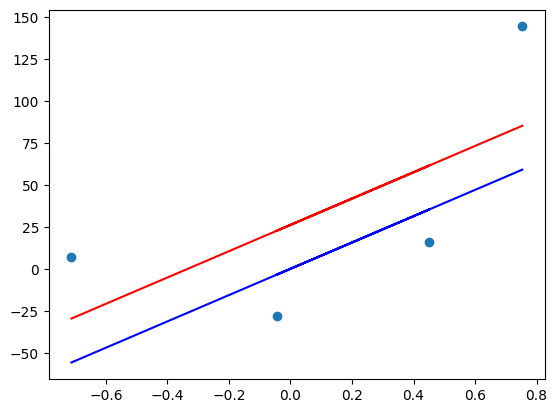

In [12]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red',label='OLS')
plt.plot(x,y_pred,color='blue',label='b=0')

In [13]:
m=lr.coef_
b=0

loss_slope=-2*np.sum(y-m*x.ravel()-b)
loss_slope

np.float64(-209.27706274506096)

In [16]:
n=0.1

stepsize=n*loss_slope
b=b-stepsize

In [17]:
y_pred1=((m*x)+b).reshape(4)

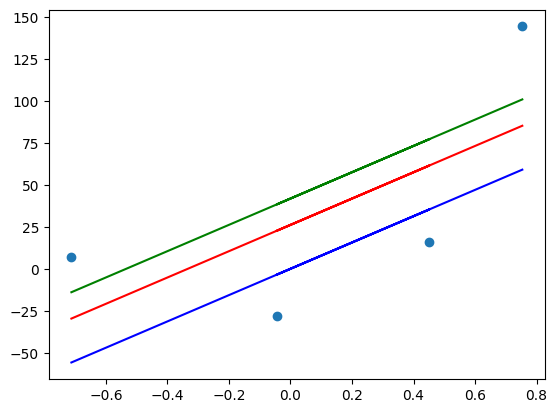

In [20]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red',label='OLS')
plt.plot(x,y_pred,color='blue',label='b=0')
plt.plot(x,y_pred1,color='green',label='b=bnext')

In [23]:
loss_slope=-2*np.sum(y-m*x.ravel()-b)

stepsize=n*loss_slope
b=b-stepsize
y_pred2=((m*x)+b).reshape(4)

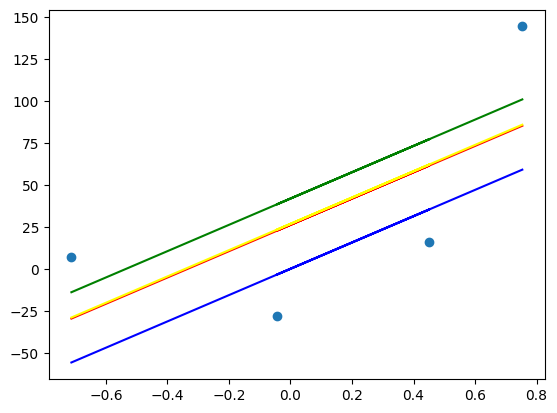

In [24]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red',label='OLS')
plt.plot(x,y_pred,color='blue',label='b=0')
plt.plot(x,y_pred1,color='green',label='b=bnext')
plt.plot(x,y_pred2,color='yellow',label='b=bnnext')

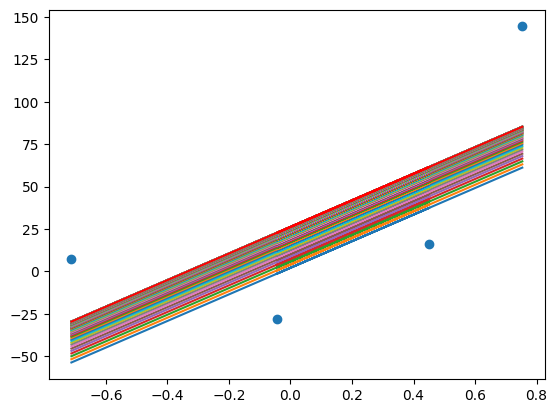

In [30]:
m=lr.coef_
b=0
n=0.01

epcohs=100
for i in range(epcohs):
    loss_slope=-2*np.sum(y-m*x.ravel()-b)
    stepsize=n*loss_slope
    b=b-stepsize
    y_pred=((x*m)+b)
    plt.plot(x,y_pred,label='b={}'.format(b))
    
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='red')

## creating class

In [31]:
x,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)

In [32]:
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

In [36]:
m=lr.coef_
b=lr.intercept_
m,b

(array([46.98055397]), np.float64(-3.2808439162913015))

In [41]:
class GD:
    def __init__(self,learning_rate,epcohs):
        self.m=m
        self.b=120
        self.n=learning_rate
        self.epochs=epcohs
    def fit(self,x,y):
        for i in range(self.epochs):
            loss_slope=-2*np.sum(y-self.m*x.ravel()-self.b)
            stepsize=self.n*loss_slope
            self.b=self.b-stepsize
        print(self.b)

In [42]:
gd=GD(0.001,100)
gd.fit(x,y)

-3.2808438911785496
